## Selena Data Visualization

Visualisasi arus kas pengeluaran dan pemasukan dari pengguna. File yang didapatkan nanti adalah json dan outputnya adalah visualisasi.

## Import Libraries

In [36]:
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [37]:
#Min-Max Scaler Initialization
scaler = MinMaxScaler(feature_range=(0, 1))

## Preprocessing Data

In [38]:
#FUNGSI UNTUK PREPROCESSING DATA

def preprocess_data(data_path):
  # Membaca file dataset
  df = pd.DataFrame(pd.read_csv(data_path))

  # Mengambil kolom yang dibutuhkan
  data_filtered = df[['TGL_TRAN', 'MUTASI_DEBET', 'MUTASI_KREDIT']].copy()

  # Menghapus titik dari kolom 'MUTASI_DEBET'
  #data_filtered['Total Pembayaran'] = data_filtered['Total Pembayaran'].astype(str).str.replace('.', '', regex=False)

  # Mengkonversi tipe data
  data_filtered['MUTASI_DEBET'] = pd.to_numeric(data_filtered['MUTASI_DEBET'])
  data_filtered['MUTASI_KREDIT'] = pd.to_numeric(data_filtered['MUTASI_KREDIT'])
  data_filtered['TGL_TRAN'] = pd.to_datetime(data_filtered['TGL_TRAN']).dt.date

  #Mengubah Nilai dalam ribuan
  data_filtered['MUTASI_DEBET'] = data_filtered['MUTASI_DEBET'] / 1000
  data_filtered['MUTASI_KREDIT'] = data_filtered['MUTASI_KREDIT'] / 1000

  #Rescaling dengan MinMaxScaler
  data_filtered[['MUTASI_DEBET']] = scaler.fit_transform(data_filtered[['MUTASI_DEBET']])
  data_filtered[['MUTASI_KREDIT']] = scaler.fit_transform(data_filtered[['MUTASI_KREDIT']])

  # Assign value variabel time dan series
  time = data_filtered['TGL_TRAN'].tolist()
  expense = data_filtered['MUTASI_DEBET'].tolist()
  income = data_filtered['MUTASI_KREDIT'].tolist()

  return time, expense, income

In [39]:
### Inisiasi variabel global ###

DATA_PATH = './data/Dataset_BRI.csv'
TIME, EXPENSE, INCOME = preprocess_data(DATA_PATH)

EXPENSE_SCALED = scaler.inverse_transform(np.array(EXPENSE).reshape(-1,1)).flatten()
INCOME_SCALED = scaler.inverse_transform(np.array(INCOME).reshape(-1,1)).flatten()

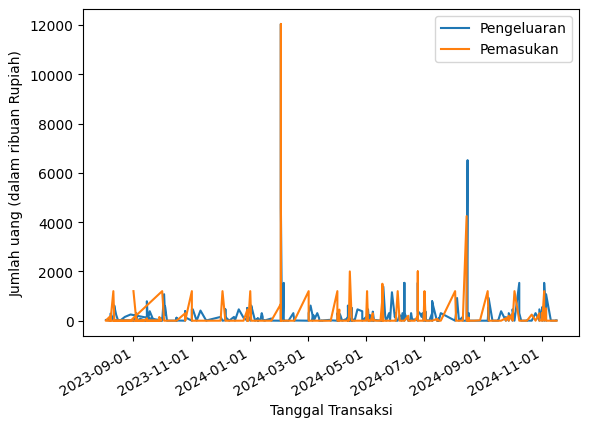

In [40]:
#Visualisasi Data

plt.plot(TIME, EXPENSE_SCALED, label = "Pengeluaran")
plt.plot(TIME, INCOME_SCALED, label = "Pemasukan")
plt.xlabel("Tanggal Transaksi")
plt.ylabel("Jumlah uang (dalam ribuan Rupiah)")
plt.gca().xaxis.set_major_formatter(DateFormatter("%Y-%m-%d"))  # Menyesuaikan format tanggal
plt.gcf().autofmt_xdate()  # Memutar tanggal agar tidak bertabrakan
plt.legend()
plt.show()

In [ ]:
#format data json
data_for_export = {
    "time" : [str(t) for t in TIME],
    "expense" : EXPENSE_SCALED,
    "income": INCOME_SCALED
}

#Simpan ke JSON
"""with open('visualisasi_data.json', 'w') as json_file:
    json.dump(data_for_export, json_file)"""

TypeError: Object of type ndarray is not JSON serializable